In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import interpolate
from scipy import fftpack as scfft
import analysis
import analysis2

In [2]:
path = "/media/ke/8tb_part2/FSL_work/test_SH/SH_036_20170417_edits.txt"
#txt_files = [file for file in os.listdir(path) if file.endswith('.txt')]
# print(txt_files)
#path = "../Austin_data/Austin_endtidal/BOLD_CO2_only_edit.txt"
# path = '/home/asophonsri/Dropbox/HMRI/Data/Austin_endtidal/BOLD_O2_only_edit.txt'
print(path)

/media/ke/8tb_part2/FSL_work/test_SH/SH_036_20170417_edits.txt


/media/ke/8tb_part2/FSL_work/test_SH/SH_036_20170417_edits.txt
       Time       O2      CO2
0  0.000000  18.1580  4.59459
1  0.000533  17.9749  4.69180
2  0.001067  17.8833  4.72457
3  0.001600  17.8833  4.43070
4  0.002133  17.8528  4.02945


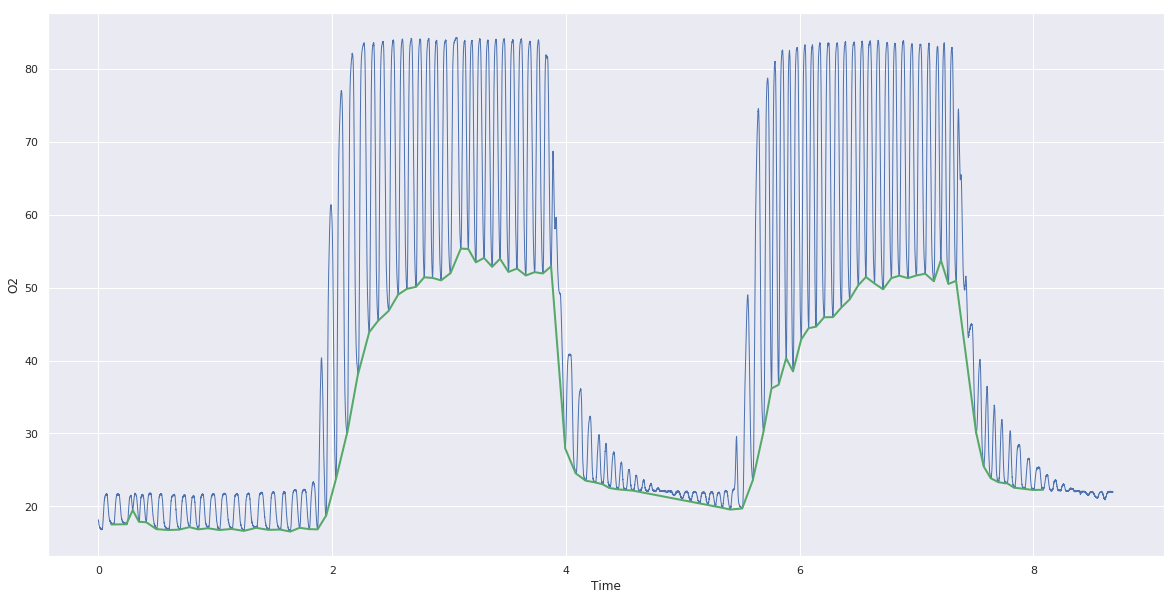

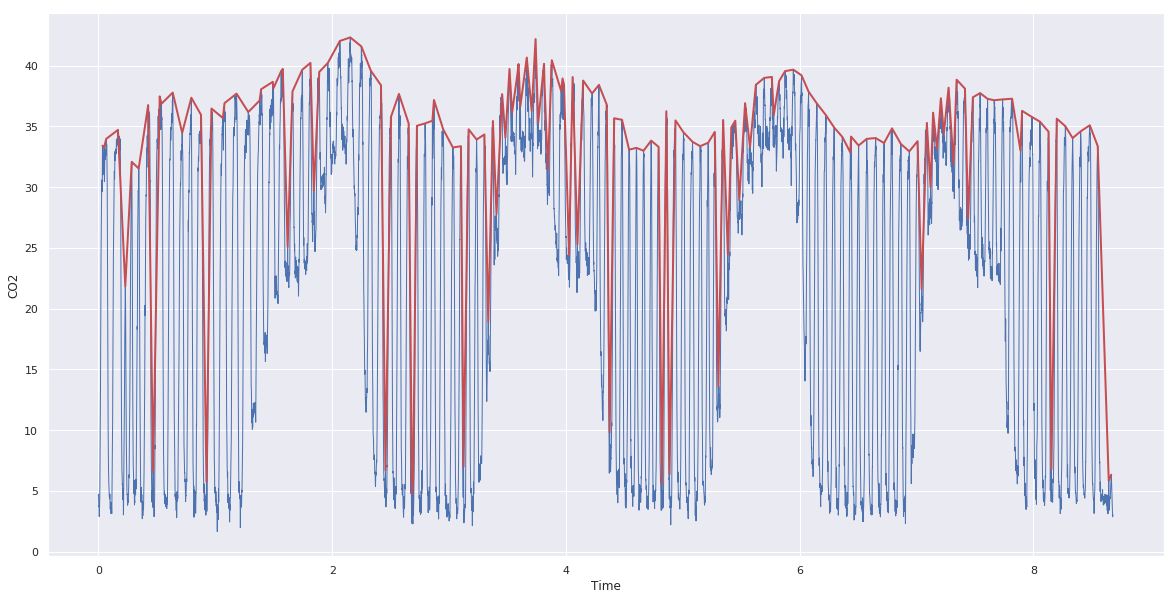

         Time       O2       CO2
208  0.110933  17.5171   3.98989
446  0.237867  17.5476   9.99055
550  0.293333  19.4702  13.28760
651  0.347200  17.8833  30.85100
766  0.408533  17.8223  29.28900
         Time       O2      CO2
65   0.034667  17.0288  33.4122
91   0.048533  20.3857  33.2585
124  0.066133  21.5759  33.9672
313  0.166933  21.6675  34.7098
431  0.229867  17.6392  21.8495


In [3]:
sns.set(rc={'figure.figsize':(20,10)})

# for file in txt_files:
#     f_path = path+file
if path:
    f_path = path
    df = pd.read_csv(f_path, sep='\t|,', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False, engine='python')
    print(f_path)
    
    print(df.head())
#    print(df.CO2.apply(lambda x:x*-1).head())
#    print(df.CO2.head())
    
#    sns.scatterplot(x='Time', y='O2', data=df, linewidth=0, s=10)
    low_O2, _ = signal.find_peaks(df.O2.apply(lambda x: x*-1), prominence=2)
    sns.lineplot(x='Time', y='O2', data=df, linewidth=1, color='b')
#    print(low_O2)
#    print()
#    print(index)
    sns.lineplot(x='Time', y='O2', data=df.iloc[low_O2], linewidth=2, color='g')
    plt.show()

#    sns.scatterplot(x='Time', y='CO2', data=df, linewidth=0, s=10)
    sns.lineplot(x='Time', y='CO2', data=df, linewidth=1, color='b')
    high_CO2, _ = signal.find_peaks(df.CO2, prominence=2)
#    print(high_CO2)
#    print()
#    print(index)
    sns.lineplot(x='Time', y='CO2', data=df.iloc[high_CO2], linewidth=2, color='r')
    plt.show()
    
#    print(len(low_O2))
#    print(len(high_CO2))
    
#    print(df.iloc[low_O2].head())
#    print(df.iloc[low_O2].O2.head())
#    print(df.iloc[high_CO2].head())
#    print(df.iloc[high_CO2].CO2.head())
    
    O2_df = df.iloc[low_O2]
    CO2_df = df.iloc[high_CO2]
    
    print(O2_df.head())
    print(CO2_df.head())
    
#    os.mkdir(path+file[:len(file)-4])
#    save_path = path+file[:len(file)-4]+'/O2_contrast.txt'
#    O2_df.to_csv(path_or_buf=save_path, sep='\t', header=False, index=False)
#    save_path = path+file[:len(file)-4]+'/CO2_contrast.txt'
#    CO2_df.to_csv(path_or_buf=save_path, sep='\t', header=False, index=False)
    
    
#    N = len(df)
#    T = 1.5 # given through json file (TR)
#    T = df.Time[1] # time between each data point
#    O2_x = np.linspace(0.0, N*T, N)
    
#    O2_xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#    O2_yf = fft(df.O2)
#    O2_w = signal.blackman(N)
#    O2_ywf = fft(df.O2 * O2_w)
    
#     plt.semilogx(O2_xf[1:N//2], 2.0/N * np.abs(O2_yf[1:N//2]), '-b')
#     plt.semilogx(O2_xf[1:N//2], 2.0/N * np.abs(O2_ywf[1:N//2]), '-r')
#    plt.legend(['FFT', 'FFT w. window'])
#    plt.show()
    
#     sns.scatterplot(x='Time', y='O2', data=df, linewidth=0, s=10)
#     high_O2 = signal.find_peaks(df.O2, prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[high_O2[0]], linewidth=4, color='r')
#     low_O2 = signal.find_peaks(df.O2.apply(lambda x: x*-1), prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[low_O2[0]], linewidth=4, color='g')
#     plt.show()
    
    

In [4]:
b_path = "/media/ke/8tb_part2/FSL_work/SH_info/SH036/BOLD_processed/meants.txt"

       Meants
0  554.966032
1  412.088321
2  385.578978
3  383.381007
4  382.118683
320


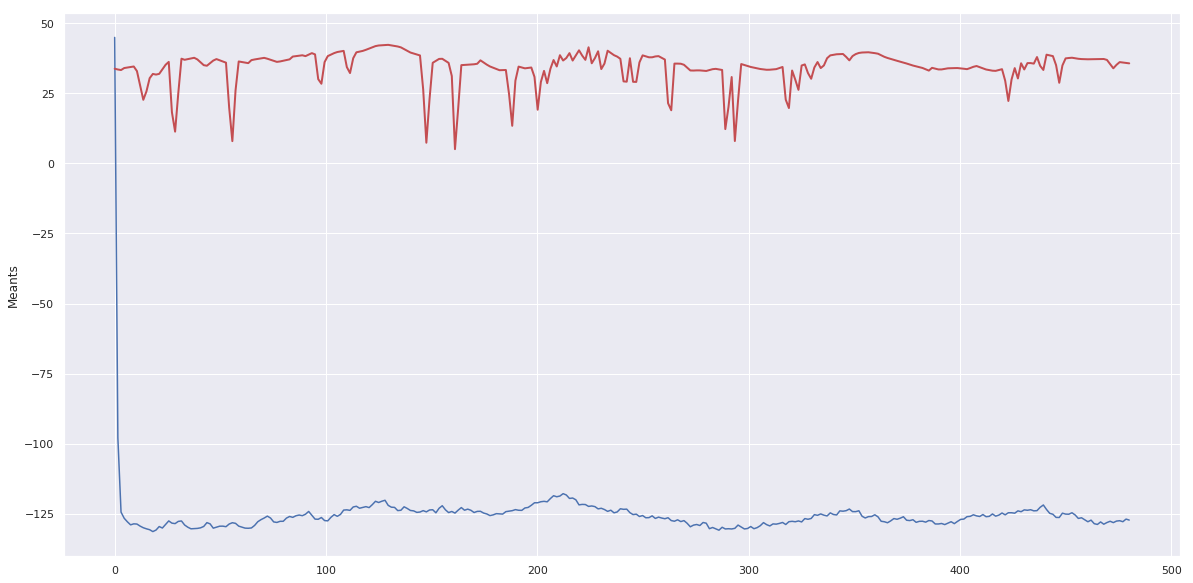

In [5]:
data_series = pd.read_csv(b_path, index_col=False, names=['Meants'])
print(data_series.head())
sns.lineplot(x=np.linspace(0,480, len(data_series)), y=data_series.Meants-510)

print(len(data_series))

CO2_fxn = interpolate.interp1d(CO2_df.Time*60, CO2_df.CO2, fill_value='extrapolate')
et_CO2 = CO2_fxn(np.linspace(0,480, len(data_series)))
sns.lineplot(x=np.linspace(0,480, len(data_series)), y=et_CO2, linewidth=2, color='r')
plt.show()

In [6]:
powCO2 = scfft.fft(et_CO2)
realCO2 = powCO2.real
compCO2 = powCO2.imag

powBOLD = scfft.fft(data_series.Meants)
realBOLD = powBOLD.real
compBOLD = powBOLD.imag

preinvCO2 = powCO2
preinvBOLD = realBOLD + 1j*compCO2

shiftedBOLD = scfft.ifft(preinvBOLD)

/home/ke/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


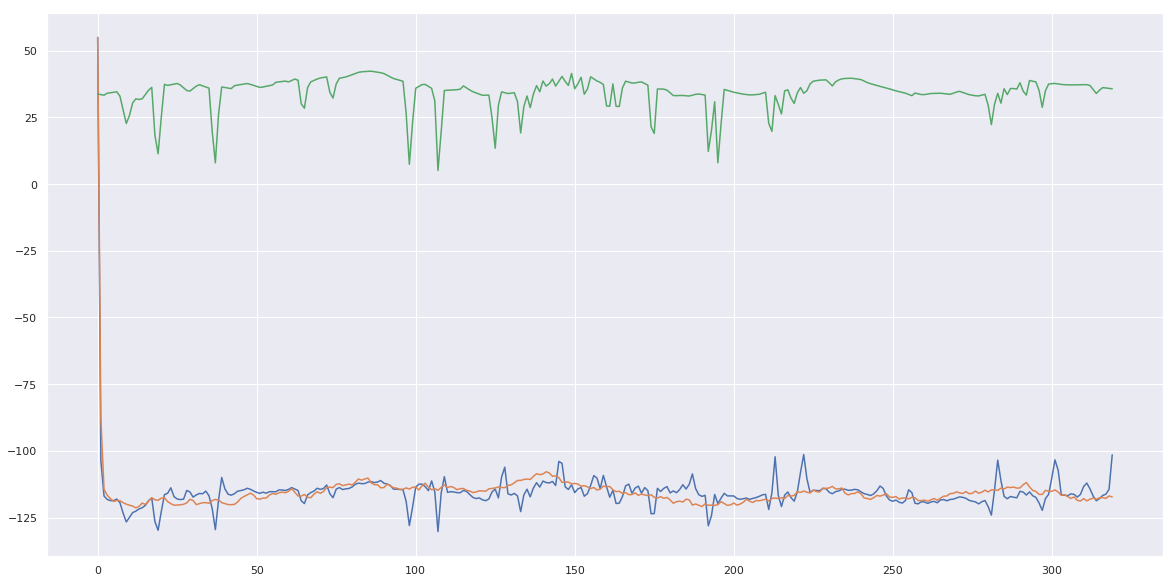

In [7]:
plt.figure(figsize=(20,10))
plt.plot(shiftedBOLD-500)
plt.plot(data_series.Meants-500)
# recreate the plot because plt.show clears plt
plt.plot(et_CO2)


In [8]:
print(df.Time.max())

8.68213


In [15]:
endTidal = pd.read_csv(path, sep='\t|,', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False, engine='python')
#drop rows with missing cols
endTidal = endTidal.dropna()

endTidal.CO2 = signal.savgol_filter(endTidal.CO2, 35, 3)

pre_O2 = analysis.fft_analysis().fourier_filter(endTidal.Time, endTidal.O2, 3, 35, 1.5)
pre_CO2 = analysis.fft_analysis().fourier_filter(endTidal.Time, endTidal.CO2, 3, 35, 1.5)

print(len(pre_O2))

meants = data_series.Meants

print(len(meants))

processed_O2 = analysis.shifter().corr_align(meants[3:], pre_O2[3:])
processed_CO2 = analysis.shifter().corr_align(meants[3:], pre_CO2[3:])

320
320


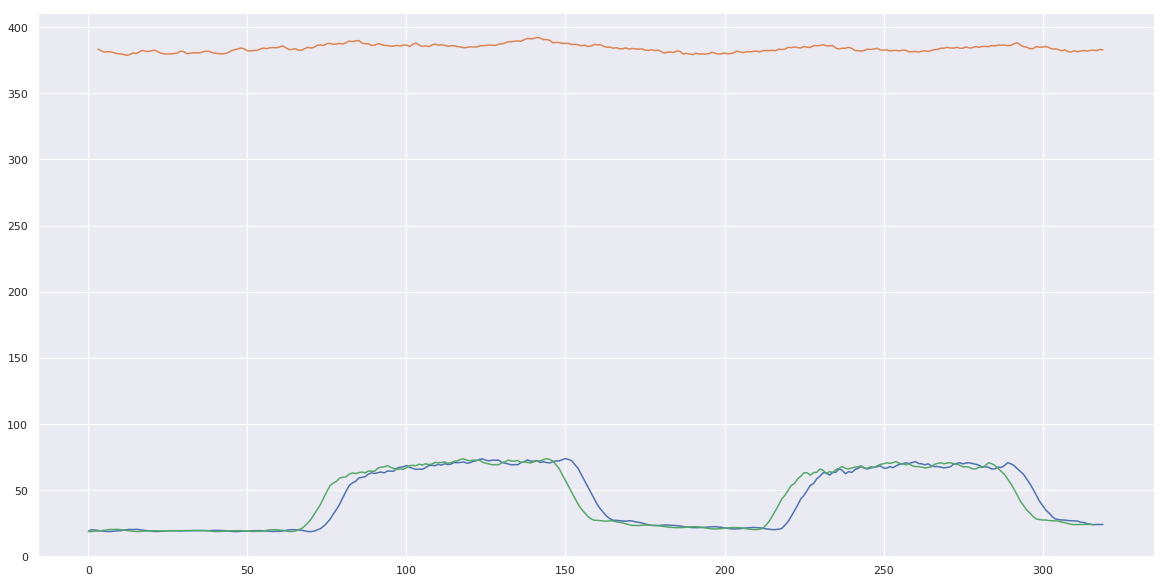

In [16]:
sns.lineplot(data=pre_O2)
sns.lineplot(data=meants[3:])
sns.lineplot(data=processed_O2)

In [17]:
endTidal = pd.read_csv(path, sep='\t|,', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False, engine='python')
#drop rows with missing cols
endTidal = endTidal.dropna()

endTidal.CO2 = signal.savgol_filter(endTidal.CO2, 35, 3)

pre_O2 = analysis2.fft_analysis().fourier_filter(endTidal.Time, endTidal.O2, 3, 35, 1.5)
pre_CO2 = analysis2.fft_analysis().fourier_filter(endTidal.Time, endTidal.CO2, 3, 35, 1.5)

print(len(pre_O2))

meants = data_series.Meants

print(len(meants))

processed_O2 = analysis2.shifter().corr_align(meants[3:], pre_O2[3:])
processed_CO2 = analysis2.shifter().corr_align(meants[3:], pre_CO2[3:])

320
320


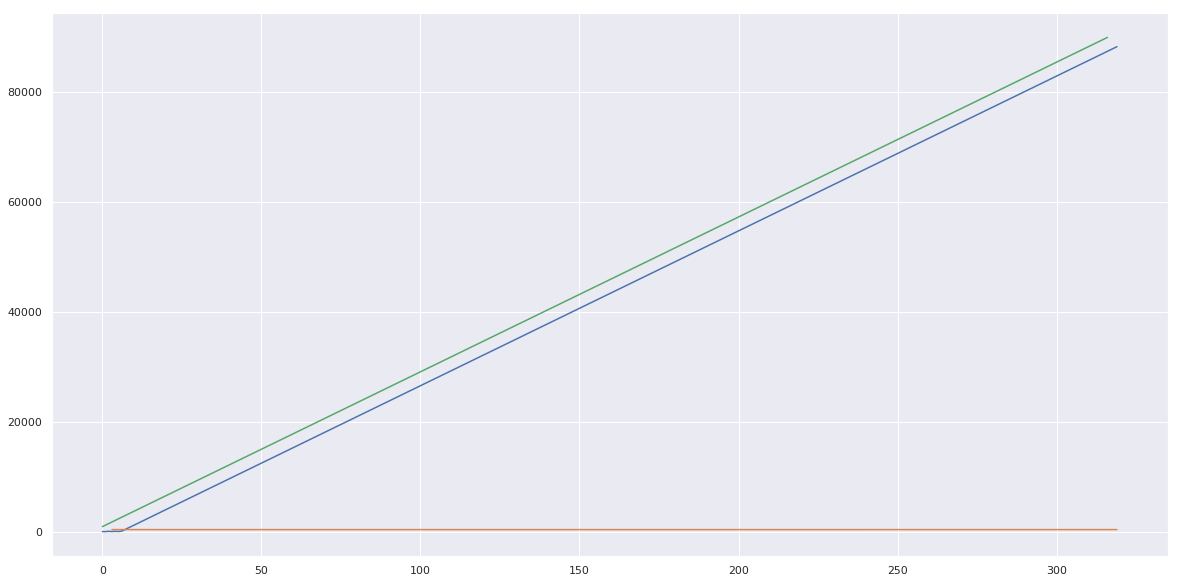

In [18]:
sns.lineplot(data=pre_O2)
sns.lineplot(data=meants[3:])
sns.lineplot(data=processed_O2)